                Отметка времени  Итоговая оценка за экзамен по ТОЭ  \
0  2024/09/30 11:51:10 PM GMT+3                                5.0   
1  2024/09/30 11:53:32 PM GMT+3                                3.0   
2  2024/09/30 11:53:33 PM GMT+3                                3.0   
3  2024/09/30 11:57:50 PM GMT+3                                3.0   
4  2024/09/30 11:59:56 PM GMT+3                                4.0   

   С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)  \
0                                                1.0                                                                     
1                                                1.0                                                                     
2                                                1.0                                                                     
3                                                1.0                                       

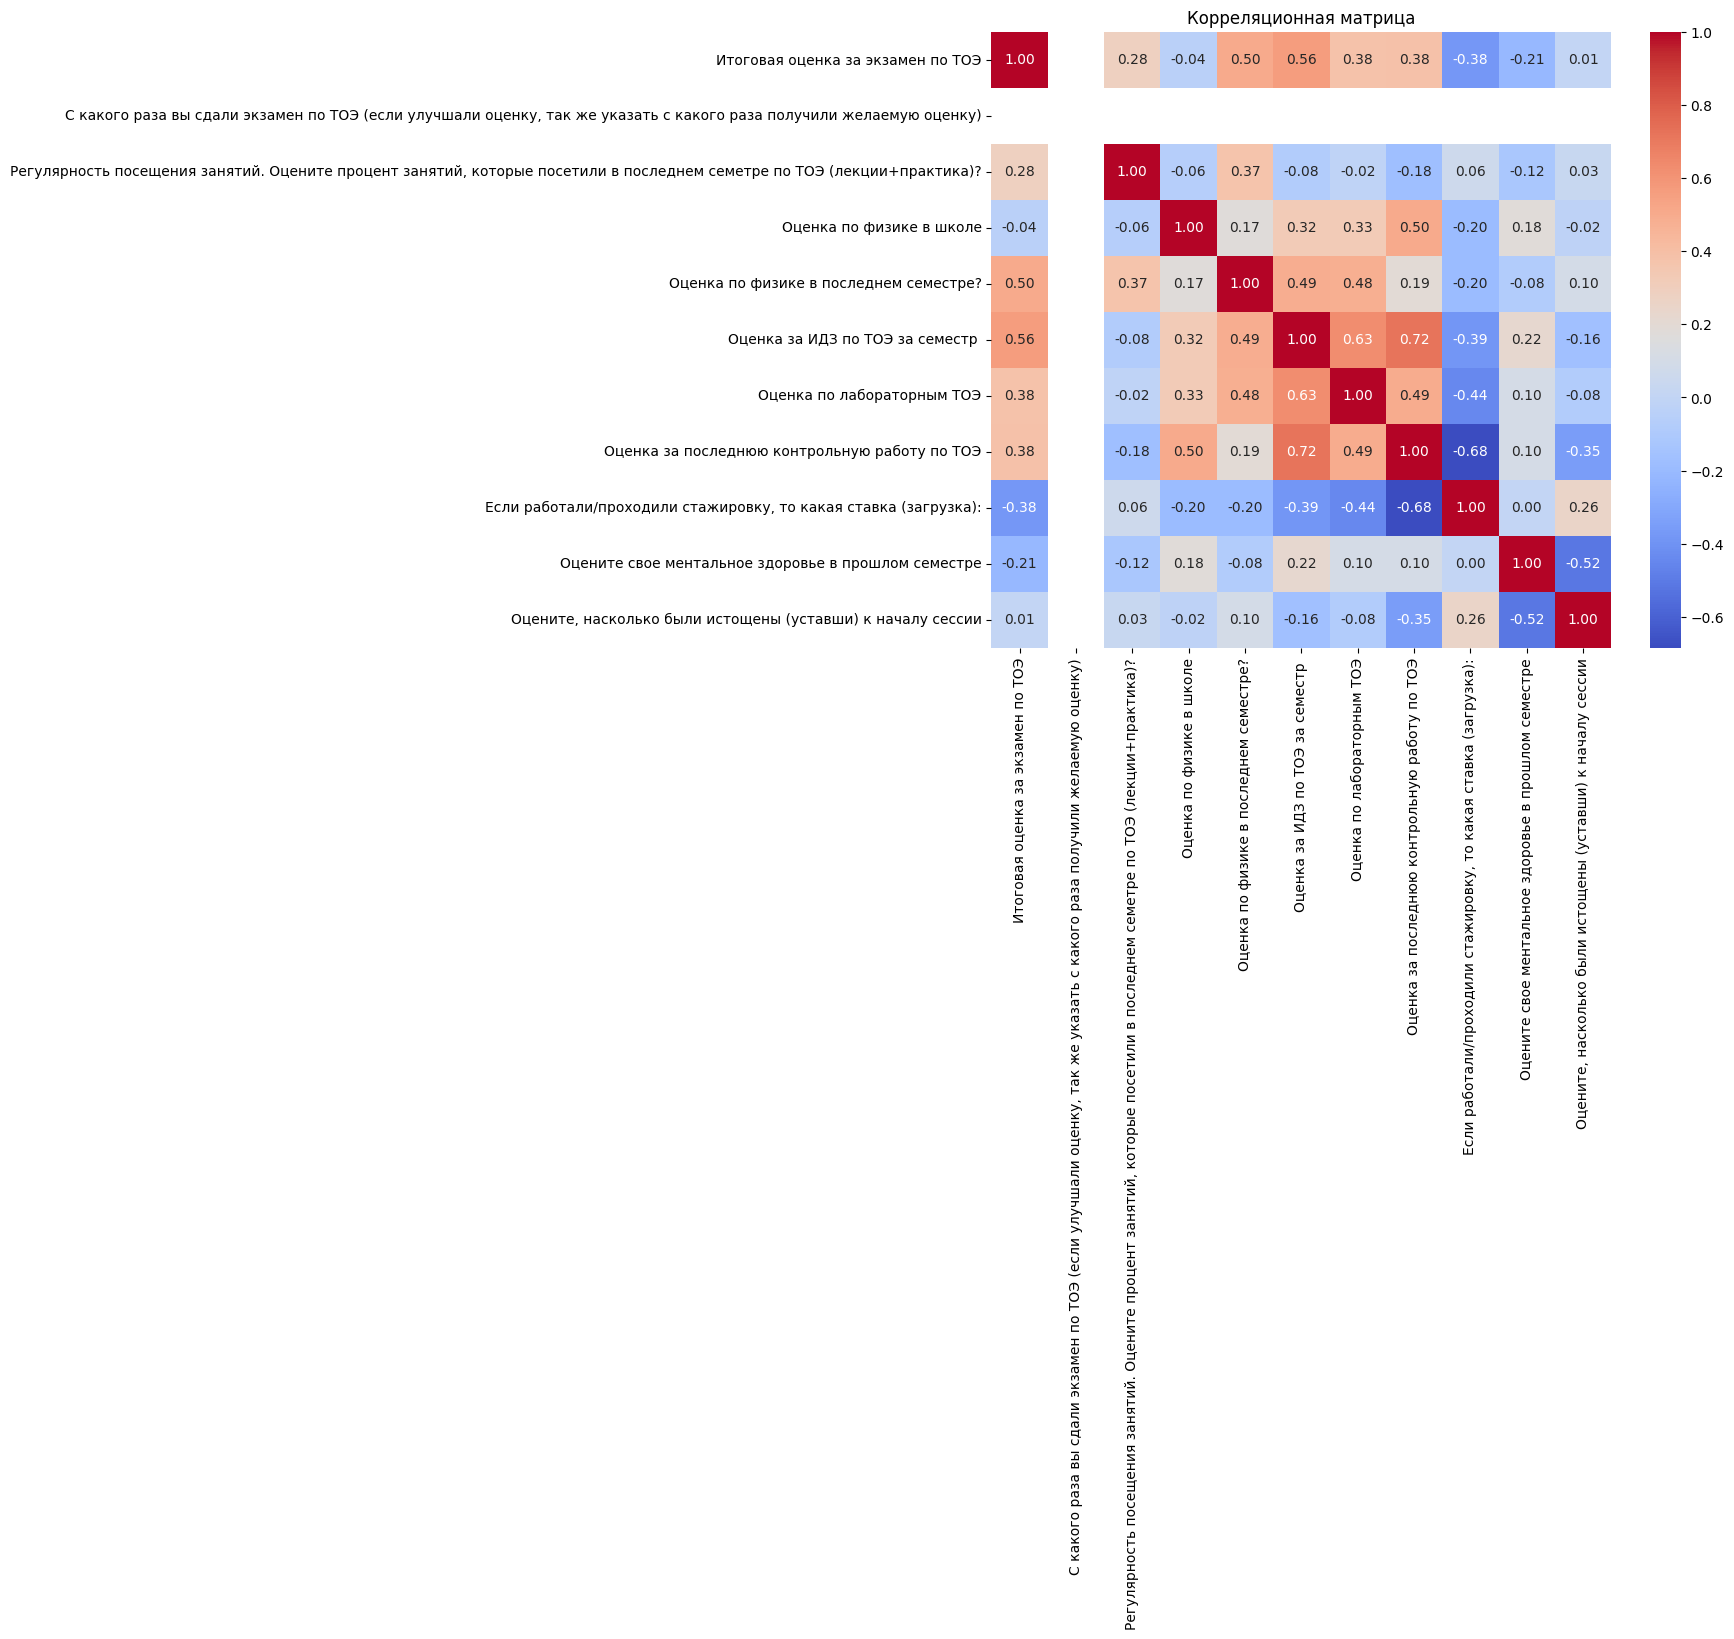

MSE: 0.3659310085481017
R^2 : 0.5425862393148729


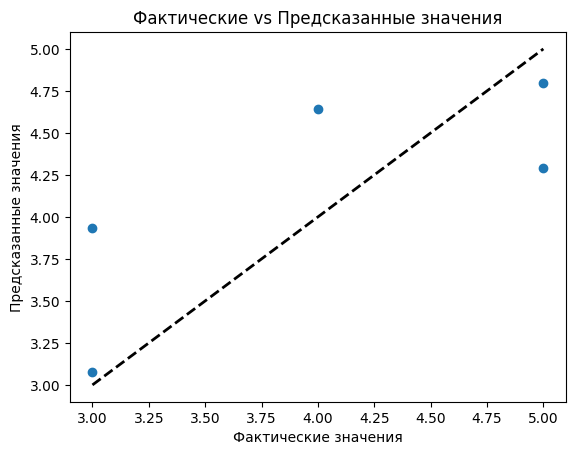

In [14]:
# Импортирование необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Загрузка данных из CSV файла
data = pd.read_csv('dataset.csv')

# Вывод первых 5 строк данных
print(data.head())

# Вывод общей информации о данных
print(data.info())

# Статистическое описание данных
print(data.describe())

# Фильтрация данных: оставляем только те строки, где значение в указанной колонке равно 1
data = data[data['С какого раза вы сдали экзамен по ТОЭ (если улучшали оценку, так же указать с какого раза получили желаемую оценку)'] == 1]

# Удаляем строки с пропущенными значениями
data = data.dropna()

# Строим корреляционную матрицу для числовых переменных
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# Разделение данных на признаки (X) и целевую переменную (y)
X = data.drop(columns=['Итоговая оценка за экзамен по ТОЭ'])
y = data['Итоговая оценка за экзамен по ТОЭ']

# Разделение данных на обучающую и тестовую выборки (80% обучающая, 20% тестовая)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определяем, какие колонки числовые, а какие категориальные
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Преобразование числовых признаков с помощью стандартизации
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Стандартизация данных
])

# Преобразование категориальных признаков с помощью One-Hot кодирования
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot кодирование для категориальных данных
])

# Применяем соответствующие преобразования для числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Создаем модель с использованием линейной регрессии
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', LinearRegression())])  # Линейная регрессия для предсказания

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

# Предсказание целевой переменной на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели с использованием MSE (среднеквадратичная ошибка) и R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Выводим результаты оценки
print(f'MSE: {mse}')
print(f'R^2 : {r2}')

# Сохраняем обученную модель в файл для дальнейшего использования
joblib.dump(model, 'TAY.pkl')

# Визуализация фактических и предсказанных значений
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Фактические vs Предсказанные значения')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Линия y=x
plt.show()


In [15]:
from google.colab import files

# Скачиваем файл модели на локальный компьютер
files.download('TAY.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>